<a href="https://colab.research.google.com/github/carolinegyireh/twitter-sentiment-analysis/blob/main/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis:
[Data](https://www.kaggle.com/datasets/daniel09817/twitter-sentiment-analysis)

### Importing Libraries/Dependencies

In [1]:
!pip install gensim
!pip install nltk
!pip install wordcloud
!pip install tensorflow

In [2]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



import warnings
warnings.filterwarnings("ignore")

In [3]:
# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading and exploring data

In [4]:
# Loading the dataset
data = pd.read_csv('/content/twitter sentiment analysis.csv')

print(f'Column: \n {data.columns}  \n')
print(f'Data Shape: \n {data.shape} \n')
data.head()

Column: 
 Index(['Text', 'Label'], dtype='object')  

Data Shape: 
 (691248, 2) 



,Text,Label
0,rwanda is set to host the headquarters of unit...,positive
1,it sucks for me since im focused on the nature...,negative
2,shawntarloff itsmieu you can also relate this ...,neutral
3,social security constant political crises dist...,negative
4,filmthepolicela a broken rib can puncture a lu...,negative


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691248 entries, 0 to 691247
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    691244 non-null  object
 1   Label   691248 non-null  object
dtypes: object(2)
memory usage: 10.5+ MB
None


In [6]:
# Printing stopwords in the dataset
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [7]:
data['Text'].value_counts()

,count
Text,
surprisingly controversial topics might just be your cup of t more for leo,491
you might want to scale mountains now but your highminded id more for gemini,449
good morning,435
incredible,394
perfect,183
...,...
my heart was broken my heart was broken sorrow sorrow sorrow sorrow,1
i thought they had broken up isoouuu,1
draymond wouldve been in the g league if not for steph creating a lane for him to be impactful now he thinks hes more than what he is he has lost his way trying to be one of the cool kids pride comes before a fall,1


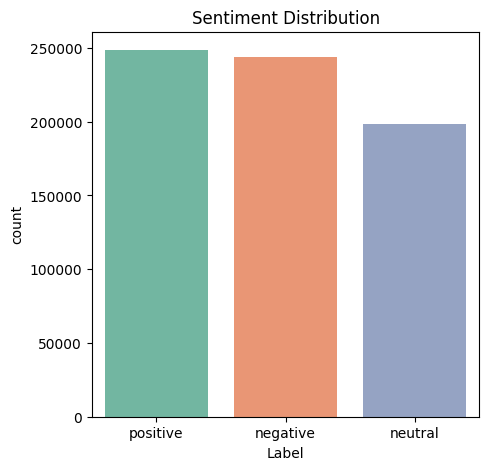

In [8]:
# Sentiment distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='Label', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

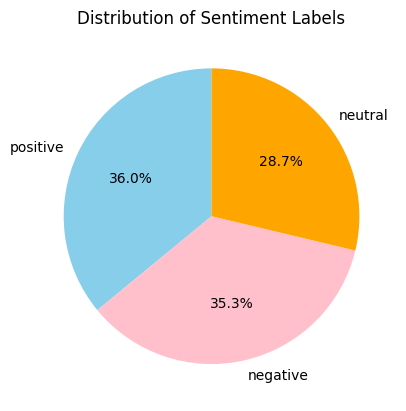

In [9]:
# Pie chart visualization
data['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink', 'orange'], startangle=90)
plt.title('Distribution of Sentiment Labels')
plt.ylabel('')
plt.show()

In [10]:
for i in range(5):
  print('Review: ', i)
  print(data['Label'].iloc[i], '\n')
  print('Sentiment: ', data['Text'].iloc[i], '\n')

Review:  0
positive 

Sentiment:  rwanda is set to host the headquarters of united nations development programmes undp new innovation financing facility find out more sovereigngroup sovereignafrica undp rwanda 

Review:  1
negative 

Sentiment:  it sucks for me since im focused on the nature aspect of things but the environmental problems we have all have their roots in social economic amp political issues simply recycling or using renewable energy is like fixing the top floor of a building with an unsteady foundation 

Review:  2
neutral 

Sentiment:  shawntarloff itsmieu you can also relate this to art too a lot of people are dismayed in starting art because of this kind of thing and i always try to tell them that everyone starts somewhere and those who are good by certain ages just trained enough to get there like with anything you learn 

Review:  3
negative 

Sentiment:  social security constant political crises distract the masses and they rob us blind meantime its coming at the 

In [11]:
print(f'Missing Values: {data.isnull().sum().sum()}')

Missing Values: 4


In [12]:
# Checking missing values
data.dropna(inplace=True)
print(f'Missing Values After Dropping: {data.isnull().sum().sum()}')

Missing Values After Dropping: 0


In [13]:
data['Label'].value_counts()

,count
Label,
positive,248514
negative,244144
neutral,198586


In [14]:
# Text Preprocessing
def clean_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    text = ' '.join([word for word in text_tokens if word not in stop_words])
    return text

# Apply text cleaning
data['cleaned_text'] = data['Text'].apply(clean_text)

## Visualization

Word Cloud: Displays the most frequent words in the dataset, where the size of each word represents its frequency. This is helpful for understanding the most common terms associated with positive or negative sentiment.

In [15]:
# data["Text"] = data["Text"].astype(str)  # Convert all values to string
# # data["Text"] = data["Text"].fillna("")  # Replace NaN with an empty string

# # Generate WordCloud
# text = " ".join(data["Text"])
# wordcloud = WordCloud(width=800, height=600).generate(text)


# plt.figure(figsize=(8, 6))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()


In [16]:
data.head()

,Text,Label,cleaned_text
0,rwanda is set to host the headquarters of unit...,positive,rwanda set host headquarters united nations de...
1,it sucks for me since im focused on the nature...,negative,sucks since im focused nature aspect things en...
2,shawntarloff itsmieu you can also relate this ...,neutral,shawntarloff itsmieu also relate art lot peopl...
3,social security constant political crises dist...,negative,social security constant political crises dist...
4,filmthepolicela a broken rib can puncture a lu...,negative,filmthepolicela broken rib puncture lung lead ...


In [17]:
# Feature extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=6000)

# Encode Labels
label_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
data['Label'] = data['Label'].map(label_mapping)

X = tfidf.fit_transform(data['cleaned_text'])
y = data['Label']

### Model Splitting, Training

In [18]:
# splitting and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
y_train.value_counts()

,count
Label,
1,198811
-1,195315
0,158869


In [20]:
# # Handle class imbalance with SMOTE-Tomek
# smote_tomek = SMOTETomek(random_state=42)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
# print("Class distribution after SMOTE:")
# print(y_train.value_counts())

In [21]:
import numpy as np

# Sample indices from the original dataset
sample_indices = np.random.choice(X_train.shape[0], size=int(0.1 * X_train.shape[0]), replace=False)

# Apply the sampled indices to your sparse matrix and labels
X_train_sampled = X_train[sample_indices]
y_train_sampled = y_train.iloc[sample_indices]

# Now apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_sampled, y_train_sampled)

print("Class distribution after SMOTE-Tomek (sampled data):")
print(y_train_resampled.value_counts())


Class distribution after SMOTE-Tomek (sampled data):
Label
 0    19985
-1    19886
 1    19844
Name: count, dtype: int64


### Using Logistic Regression Model

In [26]:
# Train Logistic Regression Model
model_lr = LogisticRegression(class_weight='balanced', random_state=42)
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy Score: 0.9697212999732367
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97     48829
           0       0.96      0.97      0.96     39717
           1       0.98      0.97      0.98     49703

    accuracy                           0.97    138249
   macro avg       0.97      0.97      0.97    138249
weighted avg       0.97      0.97      0.97    138249



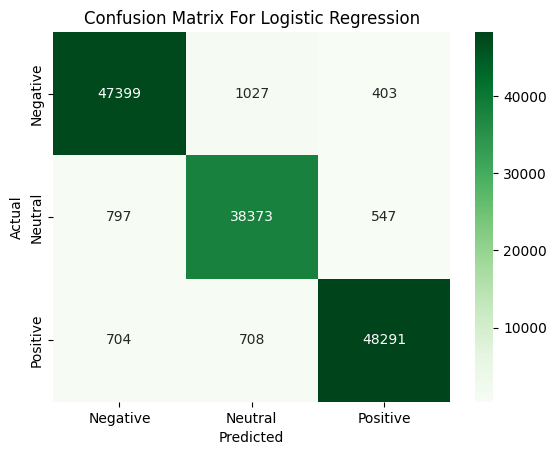

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Logistic Regression")
plt.show()


### Using Word2Vec for Feature Extraction

In [33]:
print(type(data['cleaned_text'].iloc[0]))

<class 'str'>


In [34]:
# Tokenizing sentences
data['tokenized'] = data['cleaned_text'].apply(lambda x: word_tokenize(str(x)))

# Training Word2Vec
w2v_model = Word2Vec(sentences=data['tokenized'], vector_size=100, window=5, min_count=2, workers=4)

# Creating embeddings for each tweet (mean of word vectors)
def get_w2v_embedding(words, model):
    return np.mean([model.wv[word] for word in words if word in model.wv] or [np.zeros(100)], axis=0)

X_w2v = np.array([get_w2v_embedding(words, w2v_model) for words in data['tokenized']])


### Using LSTM Model

In [38]:
from sklearn.preprocessing import LabelEncoder

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_text'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Convert labels to numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(data['Label'])

# Splitting Data
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)


In [40]:
# LSTM Model
lstm_model = Sequential([
    Embedding(5000, 128, input_length=100),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_emb, y_train_emb, batch_size=64, epochs=1, validation_data=(X_test_emb, y_test_emb))


8641/8641 ━━━━━━━━━━━━━━━━━━━━ 2396s 276ms/step - accuracy: 0.9501 - loss: 0.1257 - val_accuracy: 0.9712 - val_loss: 0.0682


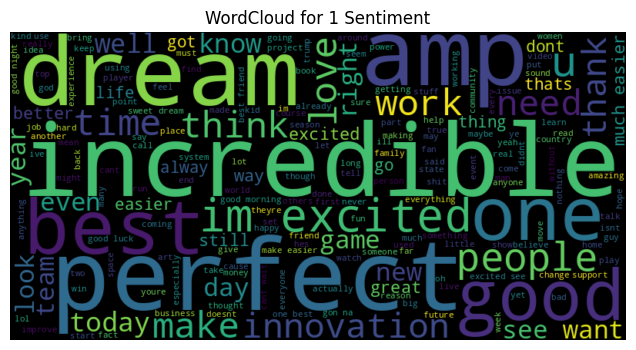

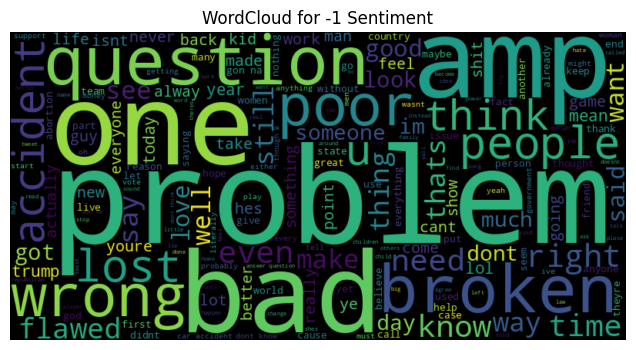

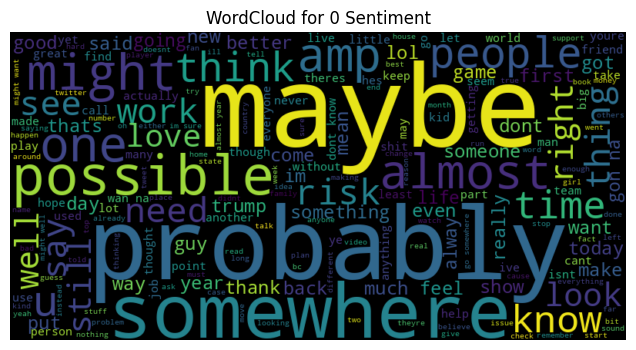

In [62]:
# word cloud for labels
def plot_wordcloud(sentiment):
    text = " ".join(data[data['Label'] == sentiment]['cleaned_text'])
    wc = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

for sentiment in data['Label'].unique():
    plot_wordcloud(sentiment)


In [43]:
# Predictions
y_pred_lstm = np.argmax(lstm_model.predict(X_test_emb), axis=1)

# Model Evaluation
print("Accuracy Score for LSTM:", accuracy_score(y_test_emb, y_pred_lstm))
print("Classification Report for LSTM:\n", classification_report(y_test_emb, y_pred_lstm))

4321/4321 ━━━━━━━━━━━━━━━━━━━━ 180s 42ms/step
Accuracy Score for LSTM: 0.9712185983262085
Classification Report for LSTM:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     49018
           1       0.97      0.96      0.96     39710
           2       0.98      0.97      0.98     49521

    accuracy                           0.97    138249
   macro avg       0.97      0.97      0.97    138249
weighted avg       0.97      0.97      0.97    138249



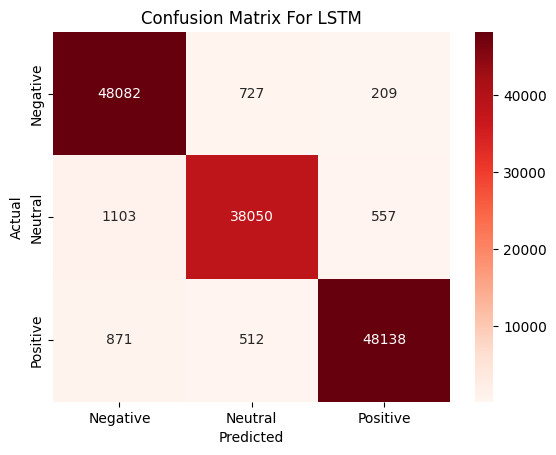

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test_emb, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For LSTM")
plt.show()


8641/8641 ━━━━━━━━━━━━━━━━━━━━ 2512s 291ms/step - accuracy: 0.9740 - loss: 0.0645 - val_accuracy: 0.9717 - val_loss: 0.0675


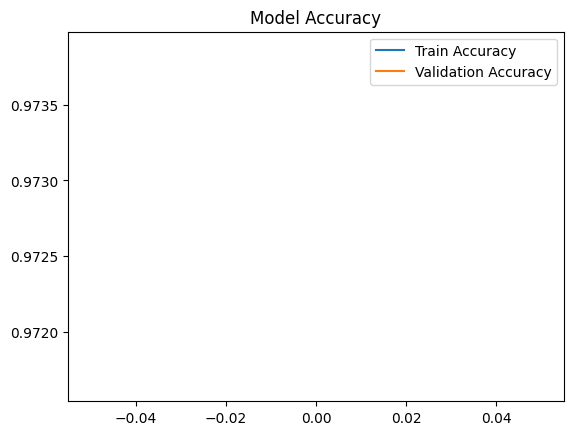

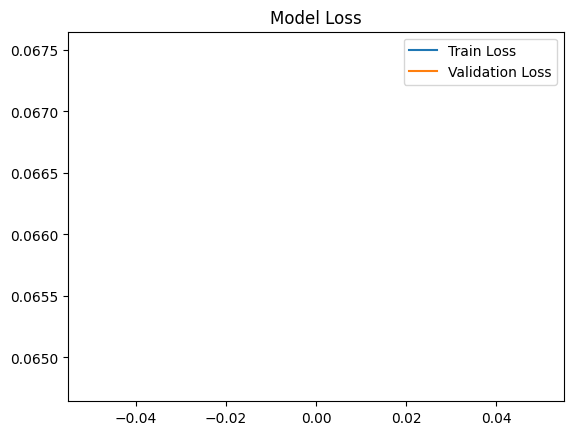

In [61]:
# Train the model
history=lstm_model.fit(X_train_emb, y_train_emb, epochs=1, batch_size=64, validation_data=(X_test_emb, y_test_emb))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [52]:
# save the model and tokenizer
import pickle
filename = 'lstm_sentiment_model.pkl'
tokenizer_filename = 'tokenizer.pkl'
pickle.dump(lstm_model, open(filename, 'wb'))
pickle.dump(tokenizer, open(tokenizer_filename, 'wb'))

### Trial

In [45]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
result = sentiment_pipeline(["I love Twitter!", "I hate delays.", "The weather is okay."])
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998200535774231}, {'label': 'NEGATIVE', 'score': 0.9854910373687744}, {'label': 'POSITIVE', 'score': 0.9997780919075012}]


## Prediction Visualization

Heatmap of Confusion Matrix: It shows how well the model predicts the sentiment classes. Higher accuracy is reflected when the diagonal values are high.

Precision-Recall Curve: This is useful when dealing with imbalanced datasets. It evaluates the trade-off between precision and recall for different thresholds.

ROC Curve: For binary classification, this plot shows the trade-off between the true positive rate and false positive rate. You can calculate the AUC to quantify the model’s ability to distinguish between classes.

4321/4321 ━━━━━━━━━━━━━━━━━━━━ 199s 46ms/step


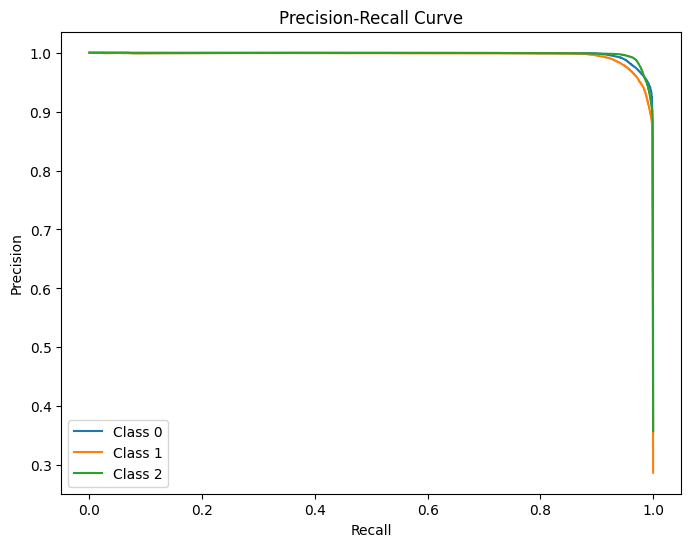

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Ensure y_test_emb is in categorical format
num_classes = len(np.unique(y_test_emb))  # Get the number of classes
y_test_bin = label_binarize(y_test_emb, classes=np.arange(num_classes))

# Get predicted probabilities
y_pred_proba = lstm_model.predict(X_test_emb)

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


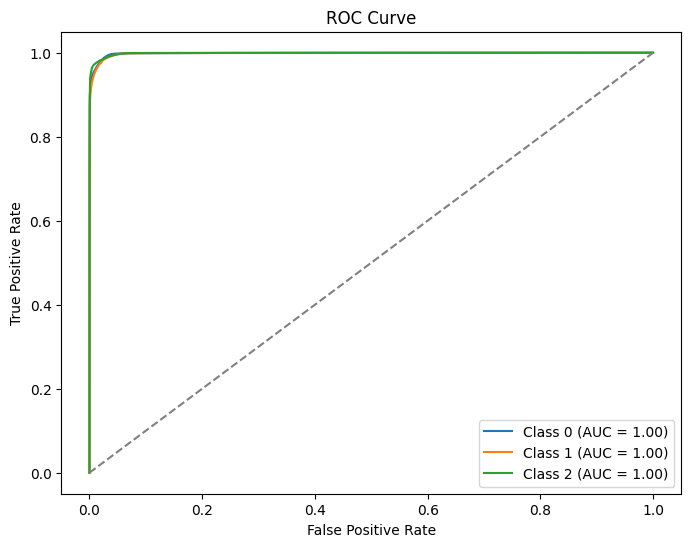

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test_emb is binarized (One-hot encoding)
num_classes = len(np.unique(y_test_emb))  # Get the number of classes
y_test_bin = label_binarize(y_test_emb, classes=np.arange(num_classes))


# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [97]:
# Store model names and their corresponding accuracy scores for comparison
models = ["Logistic Regression", "LSTM"]
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test_emb, y_pred_lstm)
]

ValueError: Found input variables with inconsistent numbers of samples: [138249, 1]

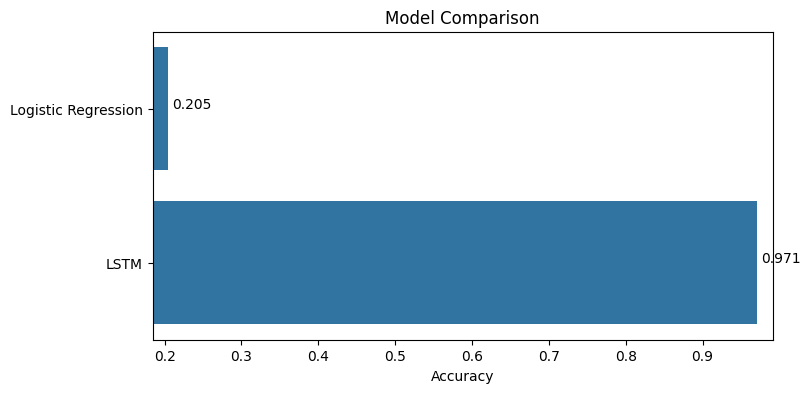

In [80]:
plt.figure(figsize=(8, 4))
sns.barplot(y=models, hue=categories, x=accuracies, orient='h')
plt.xlabel("Accuracy")
plt.title("Model Comparison")

for index, value in enumerate(accuracies):
    plt.text(value + 0.005, index, f"{value:.3f}")  # Adding labels

plt.xlim(min(accuracies) - 0.02, max(accuracies) + 0.02)  # Adjust limits for visibility
plt.show()

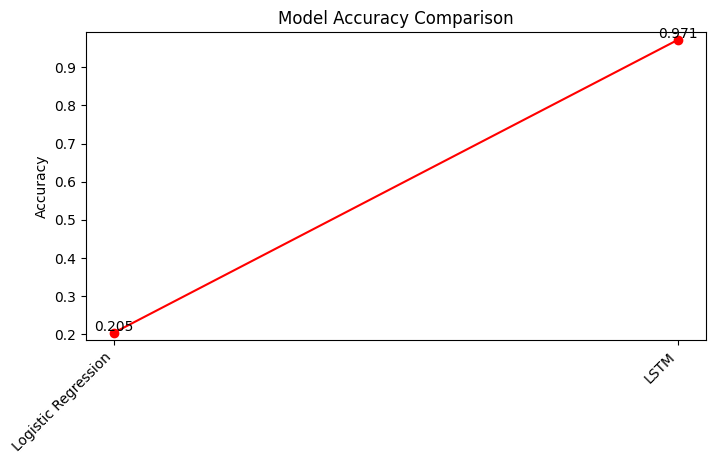

In [75]:
plt.figure(figsize=(8, 4))
plt.plot(models, accuracies, marker='o', linestyle='-', color='r')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center')

plt.ylim(min(accuracies) - 0.02, max(accuracies) + 0.02)  # Adjust y-axis range
plt.show()

Plotting Loss and Accuracy Curves: Track the performance of the model during training using training and validation accuracy and loss curves.

In [85]:
# Sample text to predict
test_text = "i hate you"

# Preprocess the text
cleaned_text = clean_text(test_text)

# Convert text into feature vector using the same vectorizer
z = tfidf.transform([cleaned_text])

# Predict using the trained stacking model
y_pred_lstm= lstm_model.predict(z)

print("Prediction:", y_pred_lstm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: [[0.49316493 0.15353    0.3533051 ]]


### Interface/UI

In [47]:
# !pip install streamlit

In [53]:
import streamlit as st
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load trained LSTM model
model = pickle.load(open("lstm_sentiment_model.pkl", "rb"))
tokenizer = pickle.load(open("tokenizer.pkl", "rb"))

st.title("Twitter Sentiment Analysis")

user_input = st.text_area("Enter a tweet:")
if st.button("Analyze"):
    seq = tokenizer.texts_to_sequences([user_input])
    pad_seq = pad_sequences(seq, maxlen=100)
    prediction = model.predict(pad_seq)
    sentiment = ["Negative", "Neutral", "Positive"][np.argmax(prediction)]
    st.write(f"Sentiment: {sentiment}")


2025-03-17 19:30:04.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 19:30:04.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar